## Logistic Regression

Logistic Regression

$p = h_\theta(x) = \sigma(\theta^T \cdot X)$ <br>


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter("ignore")
sns.set()

Sigmoid function $\sigma(t)$

$\sigma(t) = \frac{1}{1 + exp(-t)}$


Text(0, 0.5, 'sigmoid(x)')

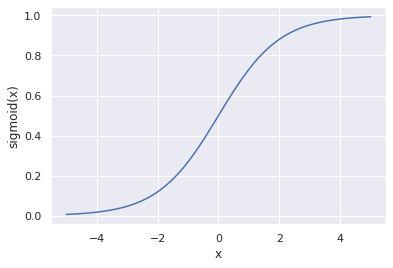

In [25]:
x = np.linspace(-5, 5)
y = 1 / (1 + np.exp(-1 * x))

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('sigmoid(x)')

Logistic model prediction

$y = \begin{cases}
        0\text{ if } p < 0.0\\
        1 \text{ if } p \geq 0.5\\
     \end{cases}$

In [26]:
from sklearn.datasets import load_iris

iris_db = load_iris()
X = iris_db['data']
y = iris_db['target']

features = iris_db['feature_names']
targets = iris_db['target_names']

features, targets

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [0]:
X = X[:, 3]                 # petal width
y = (y == 2).astype(int)    # if type == 1 if virginica, else 0

In [0]:
# reshape to vertical vector

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

In [29]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

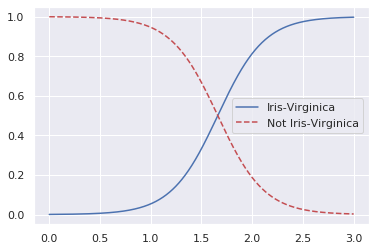

In [30]:
X_pred = np.linspace(0, 3, 1000).reshape(-1, 1)
y_pred = log_reg.predict_proba(X_pred)

plt.plot(X_pred, y_pred[:, 1], "b-", label="Iris-Virginica")
plt.plot(X_pred, y_pred[:, 0], "r--", label="Not Iris-Virginica")
plt.legend()

Boundry: [1.66066066]


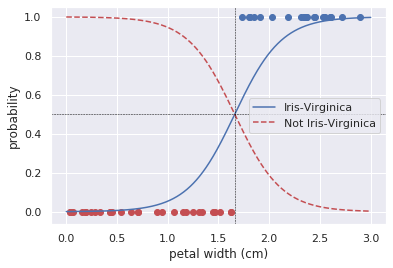

In [31]:
idx = np.random.randint(1000, size=50)

data = zip(X_pred[idx, :].flatten(), (y_pred[idx, 1] >= 0.5).astype(int))
class_0 = np.array([list(x) for x in data if x[1] == 0])
data = zip(X_pred[idx, :].flatten(), (y_pred[idx, 1] >= 0.5).astype(int))
class_1 = np.array([list(x) for x in data if x[1] == 1])

x_min = X_pred[np.argmin(np.abs(y_pred[:, 1] - 0.5))]
print('Boundry:', x_min)

plt.scatter(class_0[:, 0], class_0[:, 1], c='r')
plt.scatter(class_1[:, 0], class_1[:, 1], c='b')
plt.plot(X_pred, y_pred[:, 1], "b-", label="Iris-Virginica")
plt.plot(X_pred, y_pred[:, 0], "r--", label="Not Iris-Virginica")
plt.axhline(y=0.5, c='black', linestyle='--', lw=0.5)
plt.axvline(x=x_min, c='black', linestyle='--', lw=0.5)
plt.xlabel('petal width (cm)')
plt.ylabel('probability')
plt.legend()

In [32]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [33]:
# -------- new predictor fit on two feature --------

iris_db = load_iris()
features = iris_db['data']
targets = iris_db['target']

feature_names = iris_db['feature_names']
target_names = iris_db['target_names']

feature_names, target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [0]:
X = features[:, 2:]
y = (targets == 2).astype(int)

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [36]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_test_pred = log_reg.predict(X_test)
idx_false_predict = np.where(y_test != y_test_pred)[0]

X_test_0 = X_train[np.where(y_test == 0)[0], :]
X_test_1 = X_train[np.where(y_test == 1)[0], :]

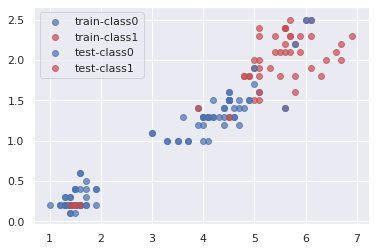

In [91]:
X_train_0 = X_train[np.where(y_train == 0)[0], :]
X_train_1 = X_train[np.where(y_train == 1)[0], :]

plt.scatter(X_train_0[:, 0], X_train_0[:, 1], c='b', alpha=0.7, label='train-class0')
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], c='r', alpha=0.7, label='train-class1')
plt.scatter(X_test_0[:, 0], X_test_0[:, 1], c='b', alpha=0.7, label='test-class0')
plt.scatter(X_test_1[:, 0], X_test_1[:, 1], c='r', alpha=0.7, label='test-class1')
plt.legend()

In [148]:
xx, yy = np.mgrid[0:8:.01, 0:3:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = log_reg.predict_proba(grid)[:, 1].reshape(xx.shape)
probs.shape

((800, 300), (800, 300))

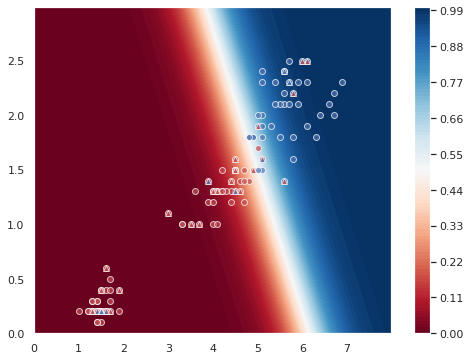

In [145]:
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 100, cmap='RdBu')
ax_c = f.colorbar(contour)
ax.scatter(X_train_0[:, 0], X_train_0[:, 1], c='r', alpha=0.7, label='train-class0', ec='w')
ax.scatter(X_train_1[:, 0], X_train_1[:, 1], c='b', alpha=0.7, label='train-class1', ec='w')
ax.scatter(X_test_0[:, 0], X_test_0[:, 1], c='r', alpha=0.7, label='test-class0', ec='w', marker='^')
ax.scatter(X_test_1[:, 0], X_test_1[:, 1], c='b', alpha=0.7, label='test-class1', ec='w', marker='^')

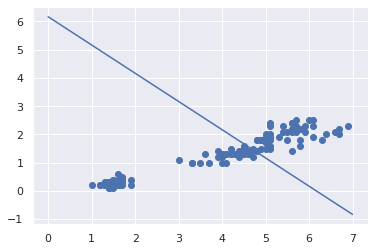

In [41]:
plt.scatter(X_train[:, 0], X_train[:, 1])
plt.plot(x, y)

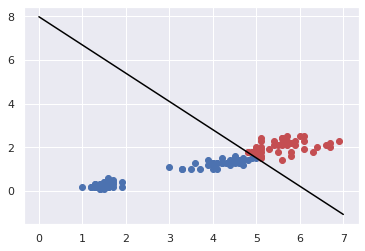

In [42]:
y_pred = log_reg.predict(X_train)
index_0 = [x for x in range(len(y_pred)) if y_pred[x] == 0]
index_1 = [x for x in range(len(y_pred)) if y_pred[x] == 1]

plt.scatter(X_train[index_0, 0], X_train[index_0, 1], c='b')
plt.scatter(X_train[index_1, 0], X_train[index_1, 1], c='r')

x = np.linspace(0, 7)
y = - (log_reg.intercept_ + log_reg.coef_[:, 0] * x) / log_reg.coef_[:, 1]
plt.plot(x, y, c='black')
# plt.ylim([0.5, 2.7])
# plt.xlim([3, 7])

## Softmax Regression

In [0]:
X = iris_db["data"][:, (2, 3)]      # petal length, petal width
y = iris_db["target"]

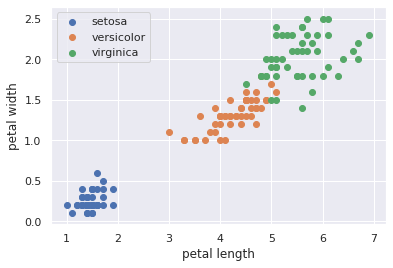

In [158]:
plt.scatter(X[np.where(y == 0)[0], 0], X[np.where(y == 0)[0], 1], label='setosa')
plt.scatter(X[np.where(y == 1)[0], 0], X[np.where(y == 1)[0], 1], label='versicolor')
plt.scatter(X[np.where(y == 2)[0], 0], X[np.where(y == 2)[0], 1], label='virginica')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()

In [150]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
xx, yy = np.mgrid[0:8:.01, 0:3:.01]


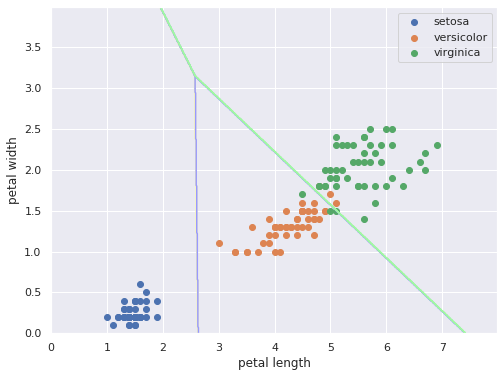

In [173]:
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

xx, yy = np.mgrid[0:8:.01, 0:4:.01]
Z = softmax_reg.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
plt.contour(xx, yy, Z, cmap=custom_cmap)
plt.scatter(X[np.where(y == 0)[0], 0], X[np.where(y == 0)[0], 1], label='setosa')
plt.scatter(X[np.where(y == 1)[0], 0], X[np.where(y == 1)[0], 1], label='versicolor')
plt.scatter(X[np.where(y == 2)[0], 0], X[np.where(y == 2)[0], 1], label='virginica')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()